<a href="https://colab.research.google.com/github/j88620714/DataScience/blob/master/HW4-6/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gspread
!pip install oauth2client
!pip install Pillow
!pip install -U -q PyDrive

     |████████████████████████████████| 993kB 3.5MB/s 


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1_7FyladR7eGnmUjsCvNF1XnpVZpuNGXm' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  #fname = os.path.join(local_download_path, f['title'])
  fname = os.path.join('/content', f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  #f_.GetContentFile(fname)
!ls "/root/data"


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

title: PCA.ipynb, id: 1lg0RyNFooBawaEt4XqM7LZij6-WnFfb2
downloading to /content/PCA.ipynb
title: 我在做啥.ipynb, id: 1wv7nlDw1fOixrkaObi1XSWslAwjCvbNk
downloading to /content/我在做啥.ipynb
title: jieba.ipynb, id: 1iG7lPVYo8jZMojmyecz6y_fN6Dj3p3pe
downloading to /content/jieba.ipynb
title: userdict.txt, id: 1_1hMPSskXBeUcVlShMLUwcplrc7X6keV
downloading to /content/userdict.txt
title: 107年-臺北市A1及A2類交通事故明細, id: 1A3V6ncj7VLNDiDkchaYPIYmqrA0trkEj8L-tHoaAyZs
downloading to /content/107年-臺北市A1及A2類交通事故明細
title: breast-cancer-colab, id: 1ONnWx9WmHGtkMRsaPO5PHEcpzYvkvTkC
downloading to /content/breast-cancer-colab
title: linePlots.ipynb, id: 1-m9LEIK5RHWw6gVtKNfuecEbUJbxsBvh
downloading to /content/linePlots.ipynb
title: 作業4-6, id: 1IpdvPdNBR3i65yOJzyYhXsJqOAhHqLMfoVewe5

1.  從試算表中載入資料，並將每筆資料分別進行斷詞。
2.  再另外將資料們以受傷與死亡為兩大類別進行斷詞找出最常出現的五十個詞，會兩類主要是因為A2車禍事件相對於A1很少，因此怕單純統一計算詞頻會失去A2事件的特徵詞彙。另外，為了讓斷詞更精確，我們也新增了自訂辭典以提高斷詞的準確率。再將兩大類各五十個詞合併，為一大項常用字詞進行後續分析。
3.   將文本斷出來的詞與常用字詞取交集，以刪去較不重要的詞彙，再看每個詞彙是否出現在每筆資料中。





In [0]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from oauth2client.client import GoogleCredentials
from google.colab import auth
from google.colab import files
auth.authenticate_user()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from IPython.display import Image
from wordcloud import WordCloud, ImageColorGenerator
import re
import jieba
import time
import pandas as pd
import math
from collections import Counter
import codecs
from sklearn.decomposition import PCA
from mlxtend.preprocessing import TransactionEncoder
gc = gspread.authorize(GoogleCredentials.get_application_default())
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1A3V6ncj7VLNDiDkchaYPIYmqrA0trkEj8L-tHoaAyZs/edit#gid=154609684')
wks4 = sh.worksheet("data")
list_of_lists = wks4.get_all_values()
wordofHurt=[]
word=""
word2=""
#files.upload()
Path = 'userdict.txt'
jieba.load_userdict(Path)
for i in range(500):
#for i in range(len(list_of_lists)):
  wordofHurt.append([])
  #list_of_lists[i].pop(0)
  #list_of_lists[i].pop(0)
  #list_of_lists[i].pop(0)
  #list_of_lists[i].pop(0)
  for j in list_of_lists[i]:
    if(j== list_of_lists[i][0] or j== list_of_lists[i][1]):
      wordofHurt[i].append(j)
  word="".join(list_of_lists[i])
  for k in '！，。\n？：；「」●＄％、qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM,./[];\=1234567890' :
    word=word.replace(k,'')
  #word2=word
  wordofHurt[i].append([])
  wordofHurt[i][2]=jieba.cut((word),cut_all=False)
  #for i in wordofHurt[i][2]:
    #print(i)

#jieba
list_of_lists2 = wks4.get_all_values()
listjoinhurt=[]
listjoindie=[]
h=0
d=0
listcutHurt=[]
listcut2Hurt=[]
listcutDie=[]
listcut2Die=[]
wordhurt=""
word2hurt=""
worddie=""
word2die=""

for i in range(len(list_of_lists2)):
  if(list_of_lists2[i][5]=="受傷"):
    listjoinhurt+=list_of_lists2[i]
    h+=1
  elif (list_of_lists2[i][5]=="死亡"):
    listjoindie+=list_of_lists2[i]
    d+=1
wordhurt="".join(listjoinhurt)
worddie="".join(listjoindie)
for k in '1234567890':
  wordhurt=wordhurt.replace(k,'')
  worddie=worddie.replace(k,'')

listcutHurt=jieba.cut((wordhurt),cut_all=False)
listcutDie=jieba.cut((worddie),cut_all=False)
for i in listcutHurt:
  if(len(i)>=2):
    listcut2Hurt.append(i)
for i in listcutDie:
  if(len(i)>=2):
    listcut2Die.append(i)
list1=Counter(listcut2Hurt).most_common(50)
list2=Counter(listcut2Die).most_common(50)
a=[]
for i in list1:
  a.append(i[0])
for i in list2:
  a.append(i[0])
print(a)

#找出現詞
label=[]
dataset=[]
smallset=[]
for i in wordofHurt:
  label.append(i[0])
  for w in i[2]:
    if w in a:
      smallset.append(w)
      #print(w)
    else:
      continue 
  dataset.append(smallset)
  smallset=[]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = label



['受傷', '晴天', '男性', '普通重型機車', '路段', '交叉路口內', '未受傷', '四岔路', '一般車道', '中山', '北投', '信義區', '中正', '自用小客車', '三岔路', '大安', '交叉口附近', '湖區', '文山', '雨天', '士林', '陰天', '巷口', '路口', '松山', '大同', '萬華區', '街口', '南港', '街巷', '段口', '乘客', '巷弄', '北路', '計程車', '南路', '段號', '忠孝', '大道', '市民', '承德路', '中山北路', '多岔路', '慢車道', '女性', '自用小貨車', '基隆', '段巷', '路號', '西路', '死亡', '晴天', '男性', '路段', '松山', '未受傷', '普通重型機車', '小時', '士林', '四岔路', '北投', '一般車道', '大安', '交叉路口內', '中山', '雨天', '南京', '交叉口附近', '受傷', '動物', '堆置物', '大同', '自用小客車', '路口', '巷口', '交通島', '三岔路', '慢車道', '陰天', '中正', '女性', '大度路', '段口', '信義區', '自用小貨車', '街口', '萬華區', '南港', '北路', '段號', '燈桿', '基隆', '中央', '行人', '研究院', '橋樑', '乘客', '區民權', '健康', '隧道']


'\n#共現性\nfrom mlxtend.frequent_patterns import apriori\nfrom mlxtend.frequent_patterns import association_rules\nminsup = 0.01\napriori(graph, min_support = minsup, use_colnames=True)\nresult = apriori(graph, min_support = minsup)\n'

In [0]:
graph.head(100)

,,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
一般車道,False,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
三岔路,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,True,True,False,False,False,False
中山,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
乘客,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
交叉口附近,False,False,False,True,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
交叉路口內,False,False,False,False,False,True,True,False,False,False,...,True,True,True,True,True,True,False,False,False,False
動物,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
北路,False,False,False,True,True,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
區民權,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
南京,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [0]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsup = 0.2
apriori(graph, min_support = minsup, use_colnames=True)

,support,itemsets
0,0.250000,(3)
1,0.227273,(4)
2,0.227273,(7)
3,0.227273,(8)
4,0.227273,(16)
5,0.204545,(17)
6,0.272727,(18)
7,0.250000,(19)
8,0.204545,(20)
9,0.295455,(24)


In [0]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsup = 0.2
result = apriori(graph, min_support = minsup)
result

,support,itemsets
0,0.250000,(3)
1,0.227273,(4)
2,0.227273,(7)
3,0.227273,(8)
4,0.227273,(16)
5,0.204545,(17)
6,0.272727,(18)
7,0.250000,(19)
8,0.204545,(20)
9,0.295455,(24)


In [0]:
rules = association_rules(result, metric="confidence", min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3),(4),0.250000,0.227273,0.204545,0.818182,3.6,0.147727,4.250000
1,(4),(3),0.227273,0.250000,0.204545,0.900000,3.6,0.147727,7.500000
2,(8),(7),0.227273,0.227273,0.227273,1.000000,4.4,0.175620,inf
3,(7),(8),0.227273,0.227273,0.227273,1.000000,4.4,0.175620,inf
4,(25),(7),0.272727,0.227273,0.204545,0.750000,3.3,0.142562,3.090909


In [0]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3),(4),0.250000,0.227273,0.204545,0.818182,3.6,0.147727,4.250000
1,(4),(3),0.227273,0.250000,0.204545,0.900000,3.6,0.147727,7.500000
2,(8),(7),0.227273,0.227273,0.227273,1.000000,4.4,0.175620,inf
3,(7),(8),0.227273,0.227273,0.227273,1.000000,4.4,0.175620,inf
4,(25),(7),0.272727,0.227273,0.204545,0.750000,3.3,0.142562,3.090909


In [0]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(3),(4),0.250000,0.227273,0.204545,0.818182,3.6,0.147727,4.250000,1
1,(4),(3),0.227273,0.250000,0.204545,0.900000,3.6,0.147727,7.500000,1
2,(8),(7),0.227273,0.227273,0.227273,1.000000,4.4,0.175620,inf,1
3,(7),(8),0.227273,0.227273,0.227273,1.000000,4.4,0.175620,inf,1
4,(25),(7),0.272727,0.227273,0.204545,0.750000,3.3,0.142562,3.090909,1


In [0]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
242,"(8, 25)",(7),0.204545,0.227273,0.204545,1.0,4.40,0.158058,inf,2
243,"(8, 7)",(25),0.227273,0.272727,0.204545,0.9,3.30,0.142562,7.272727,2
244,"(25, 7)",(8),0.204545,0.227273,0.204545,1.0,4.40,0.158058,inf,2
248,"(8, 329)",(7),0.204545,0.227273,0.204545,1.0,4.40,0.158058,inf,2
249,"(8, 7)",(329),0.227273,0.227273,0.204545,0.9,3.96,0.152893,7.727273,2


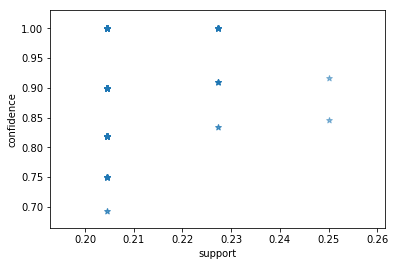

In [0]:

support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [0]:

len(rules)
rules['antecedents'].head()

0     (3)
1     (4)
2     (8)
3     (7)
4    (25)
Name: antecedents, dtype: object

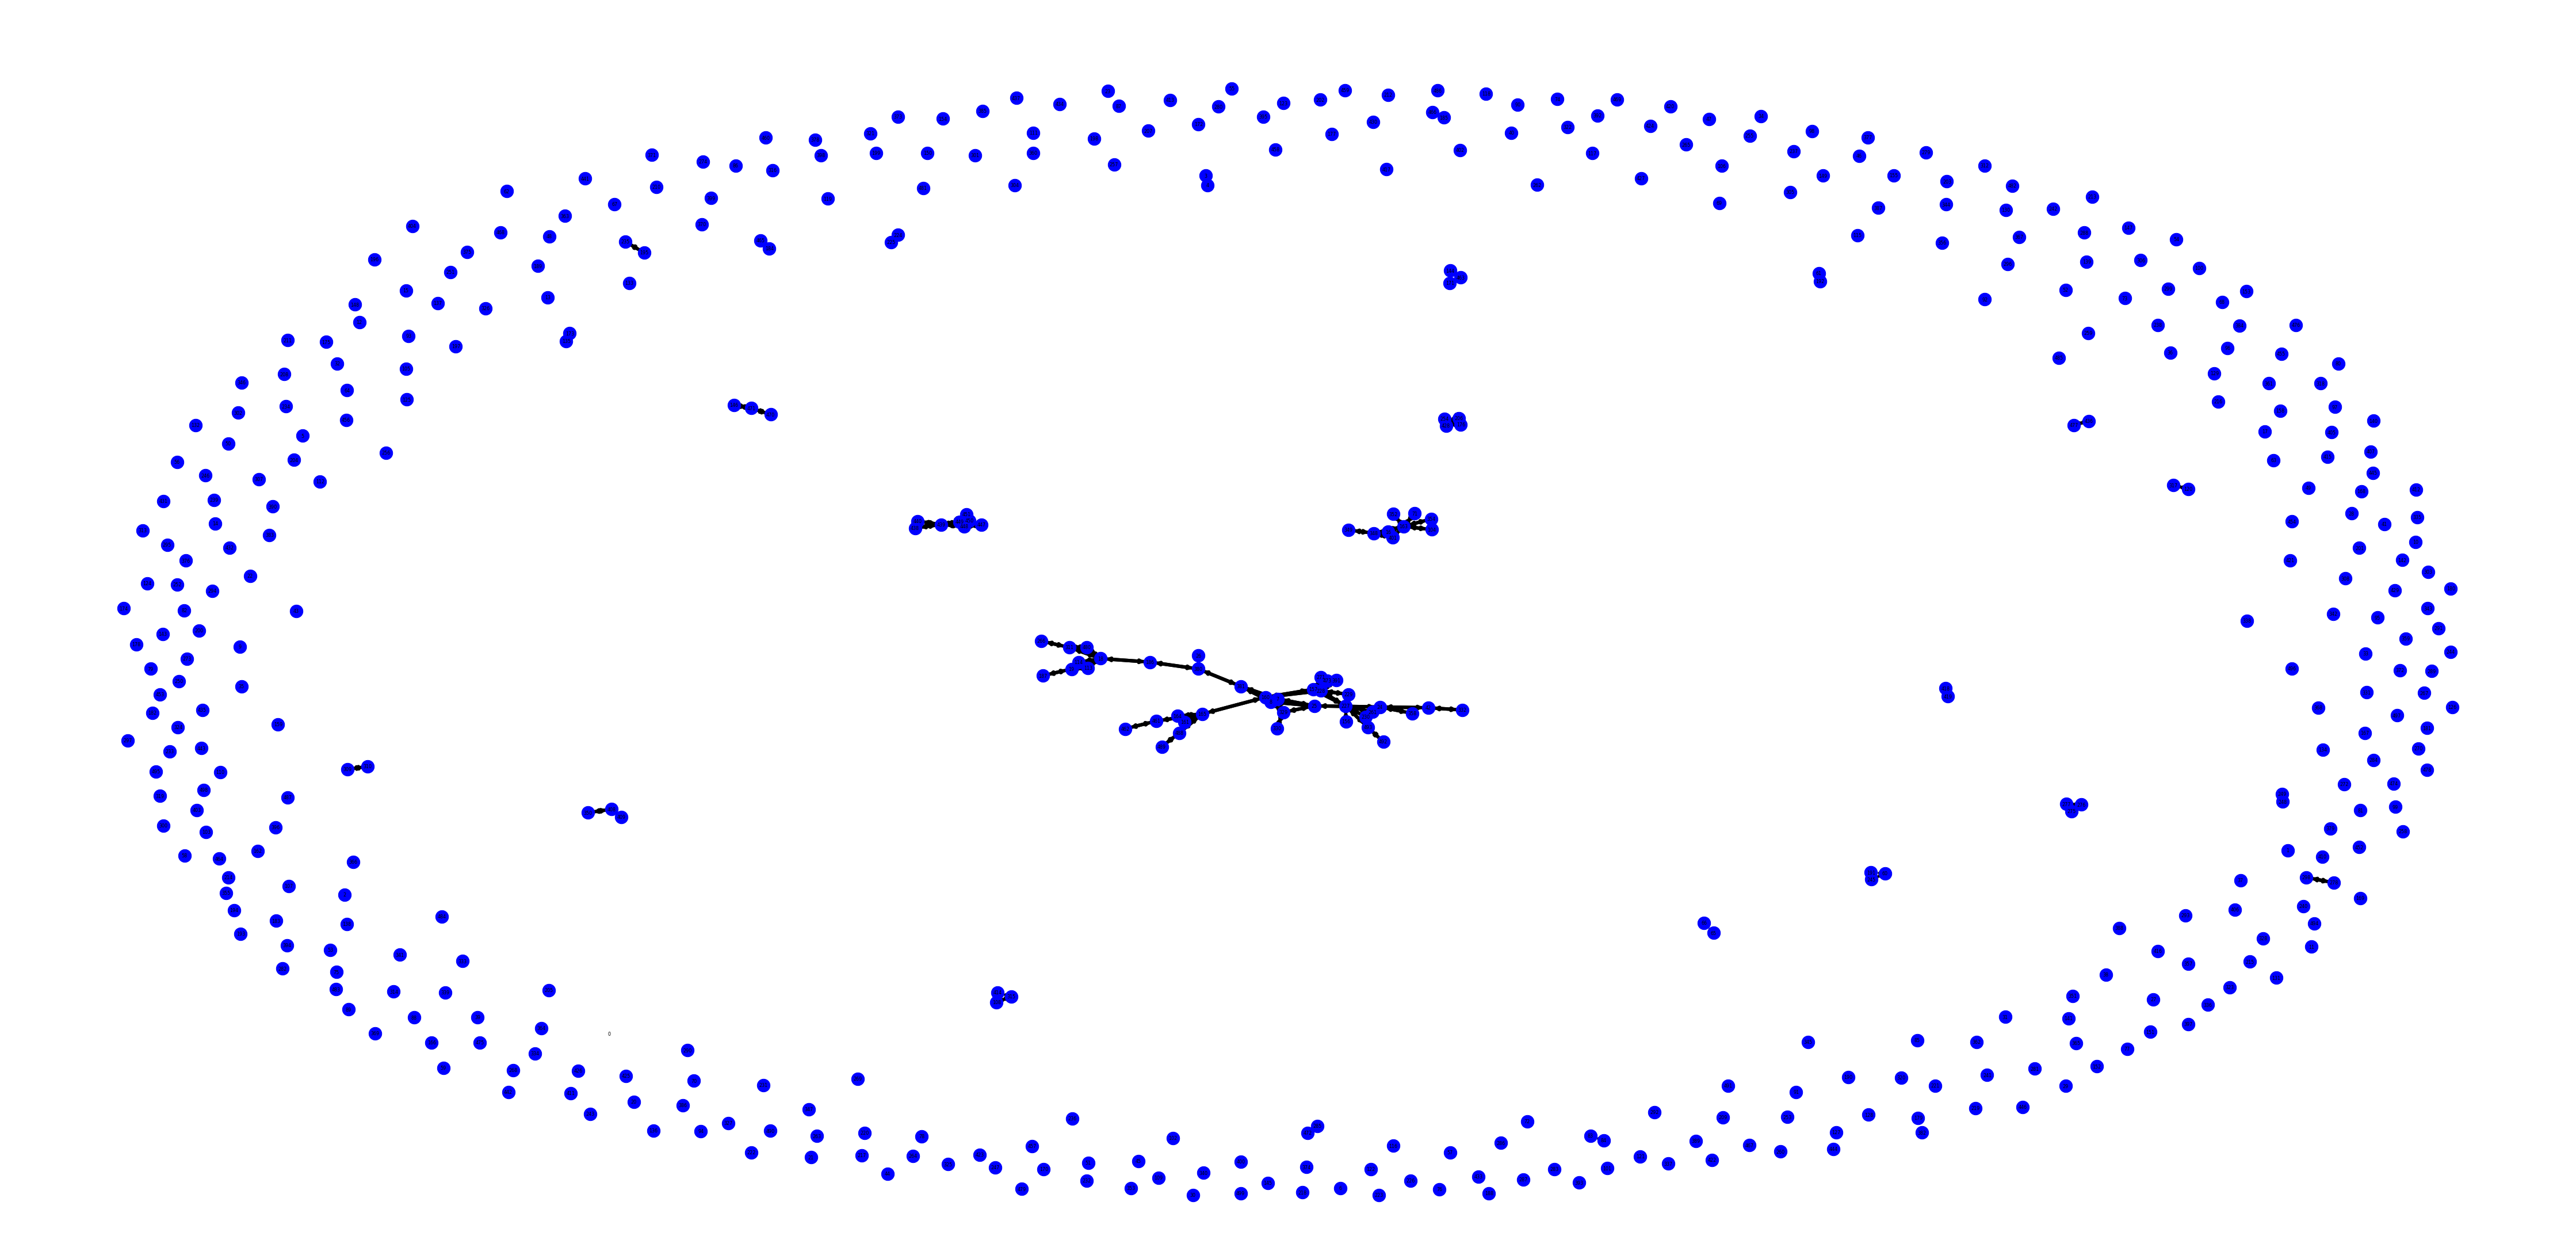

In [0]:
import networkx as nx
G = nx.DiGraph()
for i in range(500):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])
nodeListA=[]
nodeListB=[]

#nodeListA = mergeData.index[mergeData['docClass'] == 'animal'].tolist()
#nodeListB = mergeData.index[mergeData['docClass'] == 'environ'].tolist()

for i in range(500):
  if(list_of_lists2[i][5]=="受傷"):
    nodeListA.append(i)    
  elif (list_of_lists2[i][5]=="死亡"):
    nodeListB.append(i) 
  
plt.figure(figsize=(80,40))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="b", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=500)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=8,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [0]:
# 獨立議題，和其他社團無關聯
list(nx.isolates(G))

[0,
 1,
 2,
 5,
 6,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 20,
 21,
 22,
 23,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 62,
 63,
 64,
 67,
 68,
 69,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 158,
 159,
 162,
 166,
 167,
 168,
 169,
 170,
 172,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 188,
 189,
 190,
 193,
 194,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 226,
 2

In [0]:
# 小群體
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{(3, 4),
 (7, 8),
 (16, 163),
 (18, 19),
 (24, 25),
 (26, 380),
 (42, 332),
 (60, 191),
 (61, 192),
 (65, 66),
 (83, 84),
 (108, 315),
 (113, 114),
 (120, 317),
 (135, 173),
 (144, 463),
 (146, 471),
 (156, 227),
 (157, 160),
 (161, 164),
 (165, 461),
 (176, 206),
 (184, 465),
 (185, 466),
 (195, 235),
 (224, 225),
 (228, 229),
 (230, 261),
 (248, 249),
 (254, 428),
 (266, 311),
 (271, 391),
 (275, 276),
 (278, 298),
 (285, 472),
 (309, 310),
 (329, 330),
 (348, 349),
 (350, 408),
 (418, 419),
 (436, 477),
 (438, 439),
 (447, 448),
 (449, 450),
 (488, 489),
 (492, 493)}

In [0]:
pd.DataFrame(graph.columns)

,0
0,
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [0]:
!ls

sample_data
